In [1]:
! pip install pandas_datareader
! pip install yfinance
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from tabulate import tabulate
import sklearn.ensemble
from sklearn.metrics import mean_squared_error 

%matplotlib inline

     |████████████████████████████████| 5.5MB 11.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=758d552596bb6384c3e6f3d99885f8d7fcffba7d5a18f7fd5921b7c7b2065123
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


# Moving Averages & Exponential Moving Averages

**Simple Moving Averages**

In [2]:
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
apple = pdr.get_data_yahoo("AAPL", start="2010-01-01", end="2020-01-01")
amazon = pdr.get_data_yahoo("AMZN", start="2010-01-01", end="2020-01-01")
tesla = pdr.get_data_yahoo("TSLA", start="2010-01-01", end="2020-01-01")
spotify = pdr.get_data_yahoo("SPOT", start="2010-01-01", end="2020-01-01")
facebook = pdr.get_data_yahoo("FB", start="2010-01-01", end="2020-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
apple.to_csv('AAPL.csv')
amazon.to_csv('AMZN.csv')
tesla.to_csv('TSLA.csv')
spotify.to_csv('SPOT.csv')
facebook.to_csv('FB.csv')

print(apple.head())
print(amazon.tail())
print(amazon.describe())

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.583586  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.594968  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.490066  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.478067  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.521136  447610800
                   Open         High  ...    Adj Close   Volume
Date                                  ...                      
2019-12-24  1793.810059  1795.569946  ...  1789.209961   881300
2019-12-26  1801.010010  1870.459961  ...  1868.770020  6005400
2019-12-27  1882.920044  1901.400024  ...  1869.800049  6186600
2019-12-30  1874.000000  1884.000000  ...  1846.890015  3674700
2019-12-31  1842.000000  1853.260010  ...  1847.839966  2506500

[5 rows x 6 columns]
              Open 

        date     close  adj_close
0 2010-01-04  7.643214   6.583586
1 2010-01-05  7.656429   6.594968
2 2010-01-06  7.534643   6.490066
3 2010-01-07  7.520714   6.478067
4 2010-01-08  7.570714   6.521136


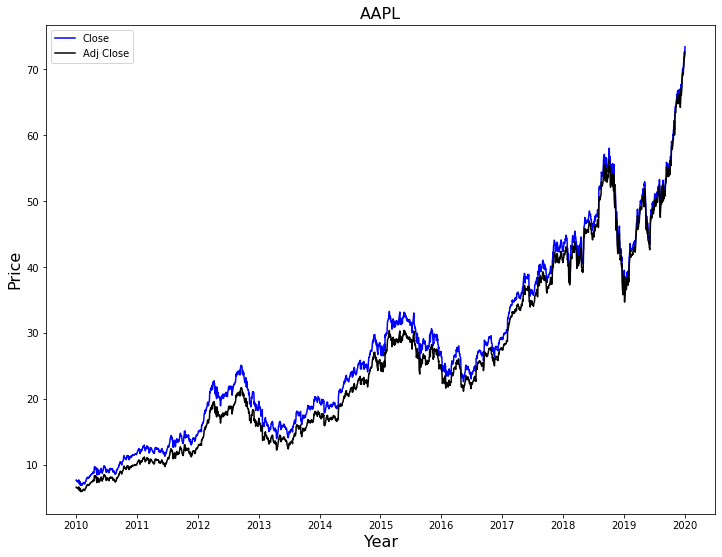

In [ ]:
# Show 10 years of AAPL Close and Adj Close prices
apple_closing = apple[['Close', 'Adj Close']]

apple_closing.reset_index(level=0, inplace=True)
apple_closing.columns=['date','close', 'adj_close']
print(apple_closing.head())

f = plt.figure() 
f.set_figwidth(12) 
f.set_figheight(9)

plt.plot(apple_closing.date, apple_closing.close, label = 'Close', color = 'blue')
plt.plot(apple_closing.date, apple_closing.adj_close, label = 'Adj Close', color = 'black')

plt.title('AAPL', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Price', fontsize = 16)

plt.legend(loc='upper left')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


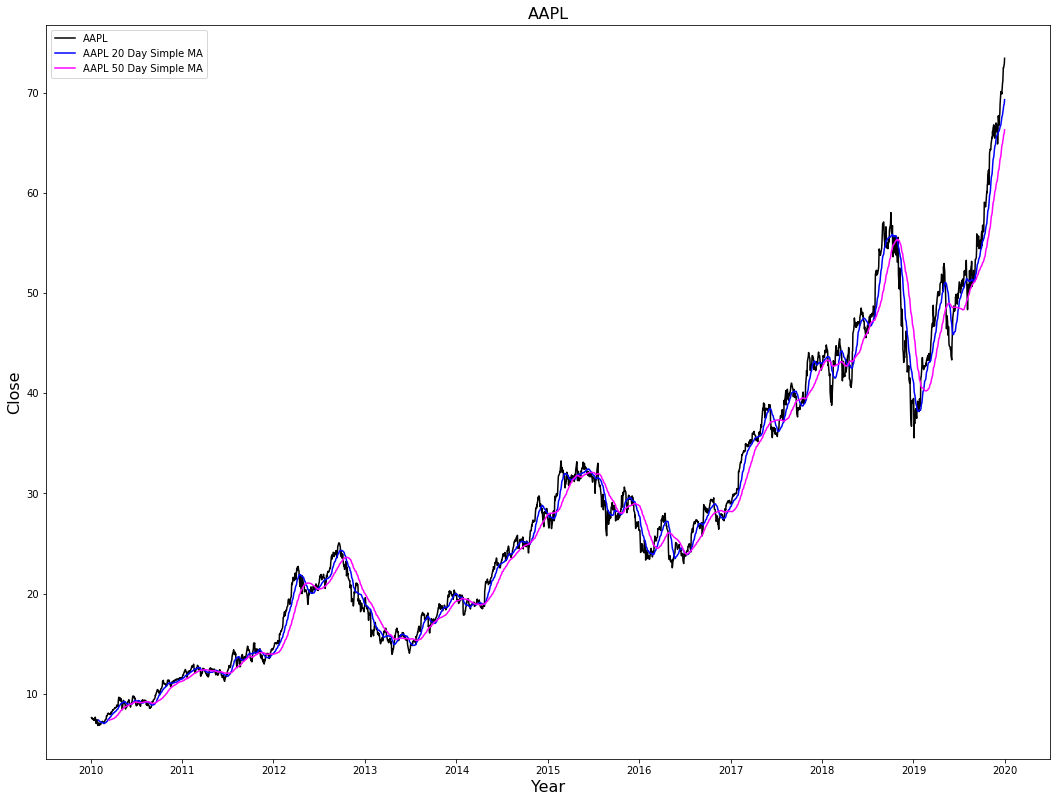

In [ ]:
# Simple Moving Averages
# Window size 20 and 50
apple_closing['MA20'] = apple_closing.close.rolling(window=20).mean()
apple_closing['MA50'] = apple_closing.close.rolling(window=50).mean()

f = plt.figure() 
f.set_figwidth(18) 
f.set_figheight(13.5)

plt.plot(apple_closing.date, apple_closing.close, label = 'AAPL', color = 'black')
plt.plot(apple_closing.date, apple_closing.MA20, label = 'AAPL 20 Day Simple MA', color = 'blue')
plt.plot(apple_closing.date, apple_closing.MA50, label = 'AAPL 50 Day Simple MA', color = 'magenta')

plt.title('AAPL', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Close', fontsize = 16)

plt.legend(loc='upper left')

plt.show()

Moving averages are calculated on close prices because we want our trading decisions to be influenced by price only.

In [ ]:
#To generate buy-sell signals
apple_closing['signal'] = 0.0
apple_closing['signal'] = np.where(apple_closing['MA20'] > apple_closing['MA50'], 1.0, 0.0)
apple_closing['position'] = apple_closing['signal'].diff()

print(tabulate(apple_closing.head(60), headers = 'keys', tablefmt = 'psql'))

+----+---------------------+---------+-------------+-----------+-----------+----------+------------+
|    | date                |   close |   adj_close |      MA20 |      MA50 |   signal |   position |
|----+---------------------+---------+-------------+-----------+-----------+----------+------------|
|  0 | 2010-01-04 00:00:00 | 7.64321 |     6.58359 | nan       | nan       |        0 |        nan |
|  1 | 2010-01-05 00:00:00 | 7.65643 |     6.59497 | nan       | nan       |        0 |          0 |
|  2 | 2010-01-06 00:00:00 | 7.53464 |     6.49007 | nan       | nan       |        0 |          0 |
|  3 | 2010-01-07 00:00:00 | 7.52071 |     6.47807 | nan       | nan       |        0 |          0 |
|  4 | 2010-01-08 00:00:00 | 7.57071 |     6.52114 | nan       | nan       |        0 |          0 |
|  5 | 2010-01-11 00:00:00 | 7.50393 |     6.46361 | nan       | nan       |        0 |          0 |
|  6 | 2010-01-12 00:00:00 | 7.41857 |     6.39009 | nan       | nan       |        0 |    

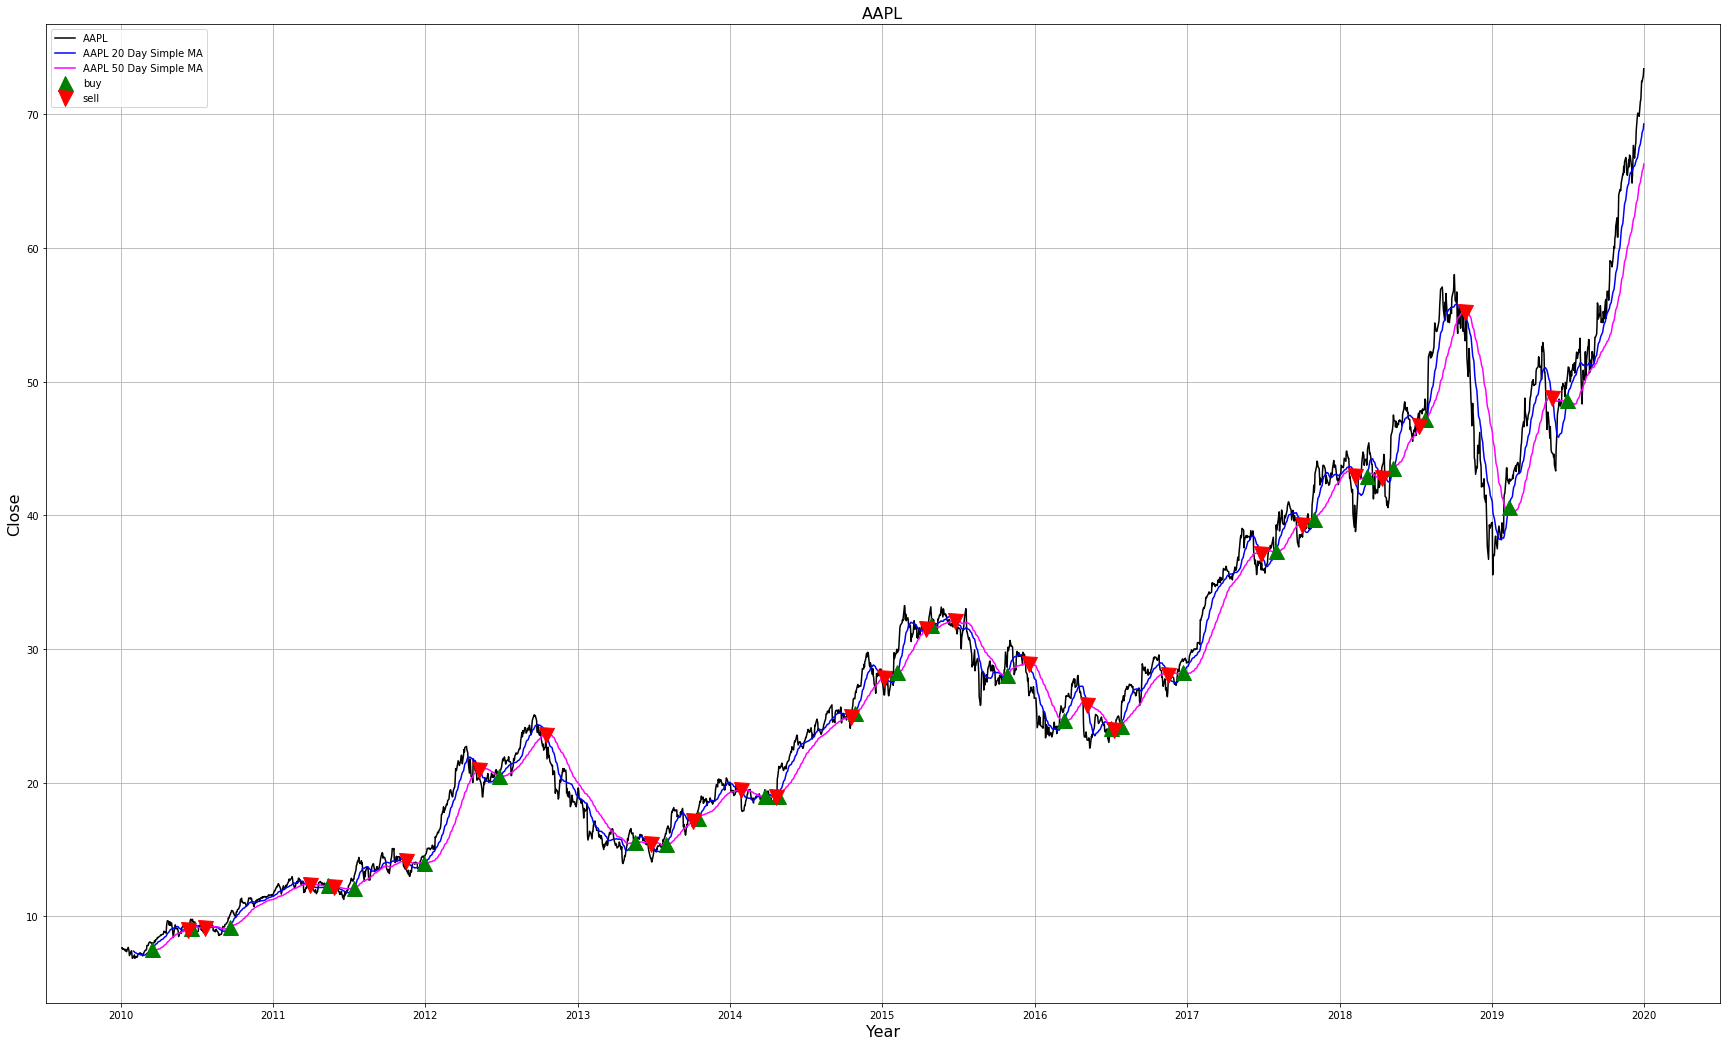

In [ ]:
# Simple moving average plotting
#Position = 1 --> short term average > long term average --> buy signal
#Position = -1 --> short term average < long term average --> sell signal

f = plt.figure() 
f.set_figwidth(30) 
f.set_figheight(18)

plt.plot(apple_closing.date, apple_closing.close, label = 'AAPL', color = 'black')
plt.plot(apple_closing.date, apple_closing.MA20, label = 'AAPL 20 Day Simple MA', color = 'blue')
plt.plot(apple_closing.date, apple_closing.MA50, label = 'AAPL 50 Day Simple MA', color = 'magenta')

# plot ‘buy’ signals
plt.plot(apple_closing[apple_closing['position'] == 1].date, 
         apple_closing['MA20'][apple_closing['position'] == 1], 
         '^', markersize = 15, color = 'green', label = 'buy')

# plot ‘sell’ signals
plt.plot(apple_closing[apple_closing['position'] == -1].date, 
         apple_closing['MA20'][apple_closing['position'] == -1], 
         'v', markersize = 15, color = 'red', label = 'sell')


plt.ylabel('Close', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.title('AAPL', fontsize = 16)

plt.legend(loc = 'upper left')
plt.grid()
plt.show()

In [ ]:
# Mean Squared Errors
MSE1 = np.square(np.subtract(apple_closing.close, apple_closing.MA20)).mean()
print("MSE for 20 Day SMA=", MSE1)

MSE2 = np.square(np.subtract(apple_closing.close, apple_closing.MA50)).mean()
print("MSE for 50 Day SMA=", MSE2)

MSE for 20 Day SMA= 1.5702063245490774
MSE for 50 Day SMA= 5.025862706536862


Observations:
1. 20 Day SMA moves faster than 50 Day SMA.
2. Moving average curves are smoothed versions of the actual prices but lagging 
3. MSE for 20 Day SMA < MSE for 50 Day SMA --> 20 Day SMA (short term) is the better price estimator 

**Exponential Moving Averages**

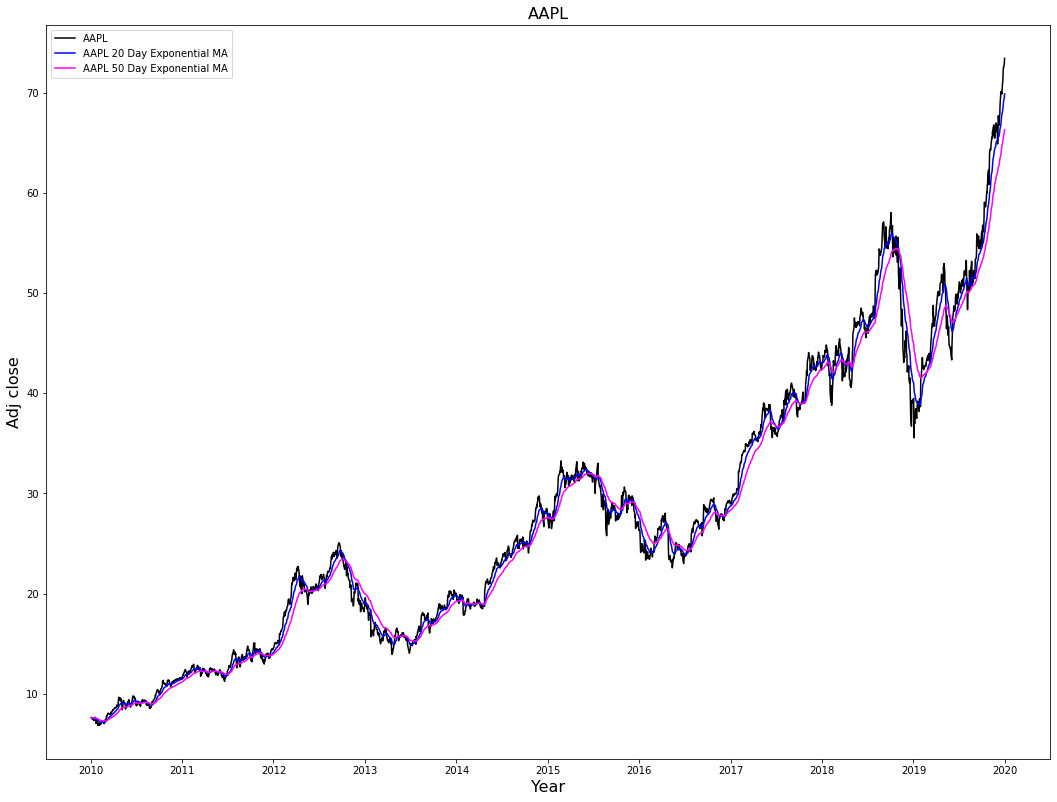

In [ ]:
# Exponential Moving Averages
# Window size 20 and 50
apple_closing['EMA20'] = apple_closing.close.ewm(span = 20, adjust = False).mean()
apple_closing['EMA50'] = apple_closing.close.ewm(span = 50, adjust = False).mean()

f = plt.figure() 
f.set_figwidth(18) 
f.set_figheight(13.5)

plt.plot(apple_closing.date, apple_closing.close, label='AAPL', color = 'black')
plt.plot(apple_closing.date, apple_closing.EMA20, label='AAPL 20 Day Exponential MA', color='blue')
plt.plot(apple_closing.date, apple_closing.EMA50, label='AAPL 50 Day Exponential MA', color='magenta')

plt.title('AAPL', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Adj close', fontsize = 16)

plt.legend(loc='upper left')
plt.show()

In [ ]:
# To generate buy-sell signals
apple_closing['ema_signal'] = 0.0
apple_closing['ema_signal'] = np.where(apple_closing['EMA20'] > apple_closing['EMA50'], 1.0, 0.0)
apple_closing['ema_position'] = apple_closing['ema_signal'].diff()

print(apple_closing.head())
print(tabulate(apple_closing.head(), headers = 'keys', tablefmt = 'psql'))

        date     close  adj_close  ...     EMA50  ema_signal  ema_position
0 2010-01-04  7.643214   6.583586  ...  7.643214         0.0           NaN
1 2010-01-05  7.656429   6.594968  ...  7.643732         1.0           1.0
2 2010-01-06  7.534643   6.490066  ...  7.639454         0.0          -1.0
3 2010-01-07  7.520714   6.478067  ...  7.634798         0.0           0.0
4 2010-01-08  7.570714   6.521136  ...  7.632285         0.0           0.0

[5 rows x 11 columns]
+----+---------------------+---------+-------------+--------+--------+----------+------------+---------+---------+--------------+----------------+
|    | date                |   close |   adj_close |   MA20 |   MA50 |   signal |   position |   EMA20 |   EMA50 |   ema_signal |   ema_position |
|----+---------------------+---------+-------------+--------+--------+----------+------------+---------+---------+--------------+----------------|
|  0 | 2010-01-04 00:00:00 | 7.64321 |     6.58359 |    nan |    nan |        0 |     

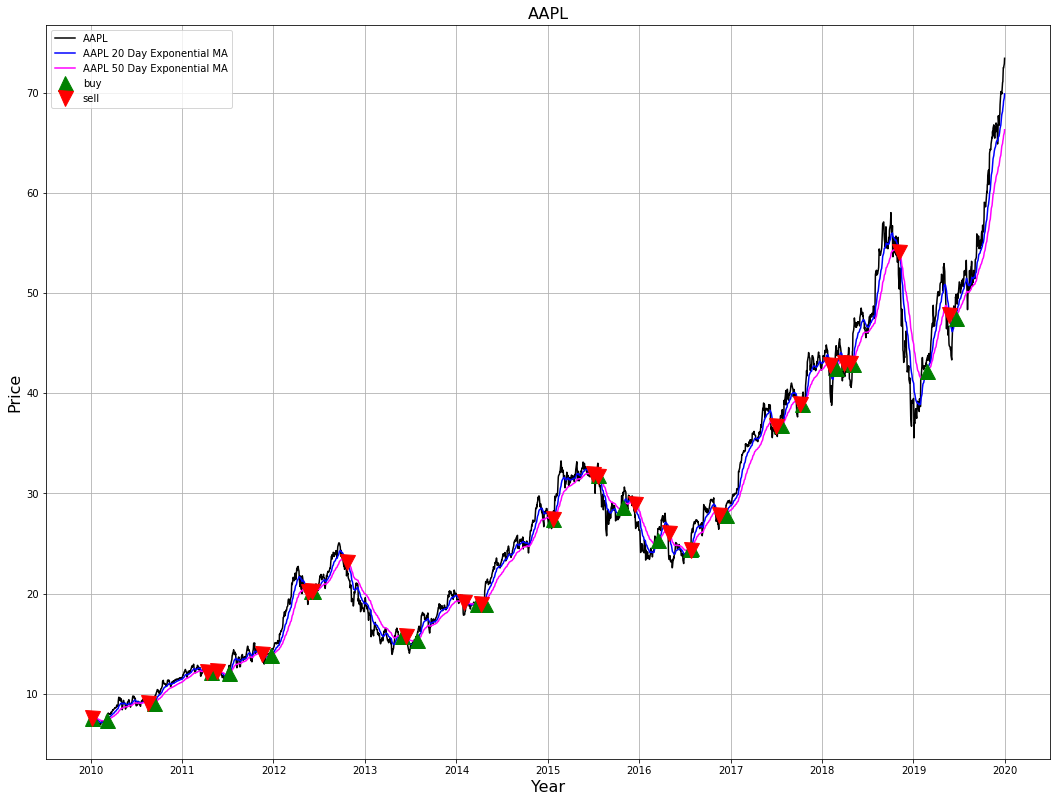

In [ ]:
#Position = 1 --> short term average > long term average --> buy signal
#Position = -1 --> short term average < long term average --> sell signal

f = plt.figure() 
f.set_figwidth(18) 
f.set_figheight(13.5)

# apple_closing['close'].plot(color = 'black', label= 'AAPL') 
# apple_closing['EMA20'].plot(color = 'blue', label = 'AAPL 20 Day Exponential MA') 
# apple_closing['EMA50'].plot(color = 'magenta', label = 'AAPL 50 Day Exponential MA')

plt.plot(apple_closing.date, apple_closing.close, color = 'black', label = 'AAPL')
plt.plot(apple_closing.date, apple_closing['EMA20'], color = 'blue', label = 'AAPL 20 Day Exponential MA')
plt.plot(apple_closing.date, apple_closing['EMA50'], color = 'magenta', label = 'AAPL 50 Day Exponential MA')

# plot ‘buy’ signals
plt.plot(apple_closing[apple_closing['ema_position'] == 1].date, 
         apple_closing['EMA20'][apple_closing['ema_position'] == 1], 
         '^', markersize = 15, color = 'green', label = 'buy')

# plot ‘sell’ signals
plt.plot(apple_closing[apple_closing['ema_position'] == -1].date, 
         apple_closing['EMA20'][apple_closing['ema_position'] == -1], 
         'v', markersize = 15, color = 'red', label = 'sell')


plt.ylabel('Price', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.title('AAPL', fontsize = 16)

plt.legend(loc = 'upper left')
plt.grid()
plt.show()

In [ ]:
# Mean Squared Errors
MSE3 = np.square(np.subtract(apple_closing.close, apple_closing.EMA20)).mean()
print("MSE for 20 Day EMA=", MSE3)
#print(MSE3)

MSE4 = np.square(np.subtract(apple_closing.close, apple_closing.EMA50)).mean()
print("MSE for 50 Day EMA=", MSE4)
#print(MSE4)

MSE for 20 Day EMA= 1.2032049395027362
MSE for 50 Day EMA= 3.6321461138908027


Observations:
1. 20 Day SMA moves faster than 50 Day SMA.
2. Exponential moving average curves are smoothened versions of the actual prices but lagging 
3. MSE for 20 Day EMA < MSE for 50 Day EMA --> 20 Day EMA (short term) is the better price estimator 
4. MSE values obtained in EMA are better than SMA --> EMA is the better prediction method

# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
print(apple_closing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2516 non-null   datetime64[ns]
 1   close         2516 non-null   float64       
 2   adj_close     2516 non-null   float64       
 3   MA20          2497 non-null   float64       
 4   MA50          2467 non-null   float64       
 5   signal        2516 non-null   float64       
 6   position      2515 non-null   float64       
 7   EMA20         2516 non-null   float64       
 8   EMA50         2516 non-null   float64       
 9   ema_signal    2516 non-null   float64       
 10  ema_position  2515 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 216.3 KB
None


In [ ]:
data_X = apple[['Open', 'High', 'Low', 'Volume']]
data_X.reset_index(level=0, inplace=True)
data_X = data_X.drop(columns = ['Date'])
print(tabulate(data_X.head(), headers= 'keys', tablefmt='psql'))

+----+---------+---------+---------+-------------+
|    |    Open |    High |     Low |      Volume |
|----+---------+---------+---------+-------------|
|  0 | 7.6225  | 7.66071 | 7.585   | 4.9373e+08  |
|  1 | 7.66429 | 7.69964 | 7.61607 | 6.01905e+08 |
|  2 | 7.65643 | 7.68679 | 7.52679 | 5.5216e+08  |
|  3 | 7.5625  | 7.57143 | 7.46607 | 4.77131e+08 |
|  4 | 7.51071 | 7.57143 | 7.46643 | 4.47611e+08 |
+----+---------+---------+---------+-------------+


In [ ]:
observations = data_X.shape[0]
print(observations)

2516


In [ ]:
data_Y = apple[['Close']]
data_Y.reset_index(level=0, inplace=True)
data_Y= data_Y.drop(columns = ['Date'])
print(tabulate(data_Y.head(), headers= 'keys', tablefmt='psql'))
#print(data_Y.head())

+----+---------+
|    |   Close |
|----+---------|
|  0 | 7.64321 |
|  1 | 7.65643 |
|  2 | 7.53464 |
|  3 | 7.52071 |
|  4 | 7.57071 |
+----+---------+


In [ ]:
# Split into train and test data
# Training data --> 8 years
# Test data --> 2 years

#train_X, test_X, train_y,test_y = train_test_split(data_X, data_Y, test_size=0.2)
train_X = data_X[0: int(0.8 * observations)]
test_X = data_X[int(0.8 * observations) :]
train_y = data_Y[0: int(0.8 * observations)]
test_y = data_Y[int(0.8 * observations) :]
#print(train_X)

print('\n\nTraining Set')
print(tabulate(train_X.head(), headers= 'keys', tablefmt='psql'))
print(tabulate(train_y.head(), headers= 'keys', tablefmt='psql'))
#print(train_X.head())
#print(train_y.head())



Training Set
+----+---------+---------+---------+-------------+
|    |    Open |    High |     Low |      Volume |
|----+---------+---------+---------+-------------|
|  0 | 7.6225  | 7.66071 | 7.585   | 4.9373e+08  |
|  1 | 7.66429 | 7.69964 | 7.61607 | 6.01905e+08 |
|  2 | 7.65643 | 7.68679 | 7.52679 | 5.5216e+08  |
|  3 | 7.5625  | 7.57143 | 7.46607 | 4.77131e+08 |
|  4 | 7.51071 | 7.57143 | 7.46643 | 4.47611e+08 |
+----+---------+---------+---------+-------------+
+----+---------+
|    |   Close |
|----+---------|
|  0 | 7.64321 |
|  1 | 7.65643 |
|  2 | 7.53464 |
|  3 | 7.52071 |
|  4 | 7.57071 |
+----+---------+


In [ ]:
print("train_X")
print(train_X)

print("train_y")
print(train_y)

print("test_X")
print(test_X)
print("test_y")
print(test_y)

train_X
           Open       High        Low     Volume
0      7.622500   7.660714   7.585000  493729600
1      7.664286   7.699643   7.616071  601904800
2      7.656429   7.686786   7.526786  552160000
3      7.562500   7.571429   7.466071  477131200
4      7.510714   7.571429   7.466429  447610800
...         ...        ...        ...        ...
2007  43.542500  44.005001  43.525002   83799600
2008  43.669998  43.855000  43.625000   65397600
2009  42.700001  42.867500  42.419998  132742000
2010  42.525002  42.695000  42.427502   85992800
2011  42.750000  42.962502  42.619999   65920800

[2012 rows x 4 columns]
train_y
          Close
0      7.643214
1      7.656429
2      7.534643
3      7.520714
4      7.570714
...         ...
2007  43.752499
2008  43.752499
2009  42.642502
2010  42.650002
2011  42.770000

[2012 rows x 1 columns]
test_X
           Open       High        Low     Volume
2012  42.630001  42.647499  42.305000  103999600
2013  42.540001  43.075001  42.314999  102223600


In [ ]:
#Creating the Regressor
regressor = LinearRegression()
regressor.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Make Predictions and Evaluate the results
predict_y = regressor.predict(test_X)
print('Prediction Score : ' , regressor.score(test_X, test_y))
error = mean_squared_error(test_y,predict_y)
print('Mean Squared Error : ', error)

Prediction Score :  0.9984648870980941
Mean Squared Error :  0.0861766148171471


In [ ]:
#To check linear regression
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(train_X, train_y)  # apply scaling on training data

print(pipe.score(test_X, test_y))

print(mean_squared_error(test_y, pipe.predict(test_X)))

0.9984648871729426
0.08617661061538393


In [ ]:
from sklearn.ensemble import RandomForestRegressor
pipe2 = make_pipeline(StandardScaler(), RandomForestRegressor())
pipe2.fit(train_X, train_y)
print(pipe2.score(test_X, test_y))

print(mean_squared_error(pipe2.predict(test_X), test_y))

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


-0.5212761333609623
85.39986030500323


# Random Forest

In [ ]:
rf = sklearn.ensemble.RandomForestRegressor()
rf.fit(train_X, train_y)

rf_predict_y = rf.predict(test_X)
print('Prediction Score : ' , np.abs(rf.score(test_X, test_y))) #Not sure why negative but bounded b/w 0 and 1
error = mean_squared_error(test_y,rf_predict_y)
print("Mean Squared Error :", error) #Error makes more sense here

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Prediction Score :  0.5235810500512188
Mean Squared Error : 85.52925138598187


# LSTM